# Vanilla Bayesian Quadrature Showcase 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.linalg as slinalg
from scipy.special import erf
from scipy.integrate import dblquad

import emulab.quadrature as eq

## 1D example for vanilla BQ
This example assumes that data is given. The outer loop comes later.

In [2]:
# set up function
h = eq.tasks.Hennig1D()

# create some data for the 1D example
np.random.seed(1)
X_1d = np.random.normal(size=(10,1))
Y_1d = h.evaluate(X_1d)

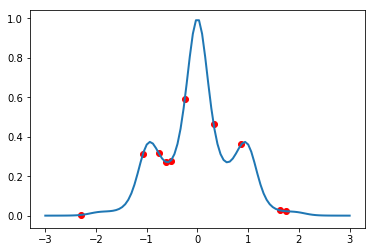

In [3]:
h.plot(100, -3, 3, lw=2)
plt.scatter(X_1d, Y_1d, c='r')
plt.show()

In [4]:
bounds = eq.IntegralBounds(np.asarray([[-3.]]), np.asarray([[3.]]))
kern  = eq.kernels.IntegrableRBFGPy(input_dim=1, integral_bounds=bounds, lengthscale=.2, variance=.25)
gp = eq.surrogate.models.GPRegressionGPy(X_1d, Y_1d, kern)
gp.Gaussian_noise.constrain_fixed(1.e-8)
gp.optimize_restarts(5)

x = np.linspace(-3, 3, 100).reshape(-1,1)

vbq = eq.surrogate.models.VanillaBayesianQuadratureGPy(base_gp=gp, X=X_1d, Y=Y_1d)
mean, var, _, _ = vbq.predict(x, return_full_cov=False)

Optimization restart 1/5, f = -3.849382335228041
Optimization restart 2/5, f = -3.849382335057842
Optimization restart 3/5, f = -3.8493823352268928
Optimization restart 4/5, f = -3.8493823352275047
Optimization restart 5/5, f = -3.849382335227972


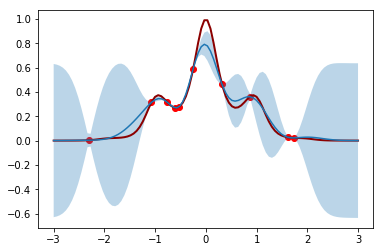

In [5]:
h.plot(100, -3, 3, lw=2, c='darkred')
plt.scatter(X_1d, Y_1d, c='r')
plt.plot(x, mean)
plt.fill_between(x[:,0], mean[:,0] + 2.*np.sqrt(var[:,0]), mean[:,0] - 2.*np.sqrt(var[:,0]), alpha=0.3)
plt.show()

In [6]:
# Integration using Vanilla BQ and RBF kernel
print(vbq.integrate())
lb, ub = bounds.get_bounds()
print(h.approximate_ground_truth_integral(lb, ub))

(1.1552481519606062, array([[0.11028643]]))
(1.1433287777179366, 6.12760955347454e-10)
